In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf

In [3]:
df = pd.read_csv("train.csv")
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')

In [4]:
rows, cols = df.shape
print(rows, cols)

184903890 8


In [6]:
kkkkkk
count_zeroes_ones = dfkkkkkkkkkkkkkkk['is_attributed'].value_counts()

print(count_zeroes_ones)

is_attributed
0    184447044
1       456846
Name: count, dtype: int64


In [10]:
df_sample = pd.read_csv("train_sample.csv")
df_sample.head(2)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0


In [11]:
r,c = df_sample.shape
print(r,c)


100000 8


In [13]:
df_test_sample = pd.read_csv("test.csv")
r,c = df_test_sample.shape
print(r,c)

18790469 7


Using the following: train.csv first 

In [15]:
import pandas as pd
import numpy as np
import os

chunk_size = 1_000_000 
desired_total_samples = 10_000_000 
positive_class = 1
negative_class = 0
output_file = 'train_st_sample.csv'

# If output file name exists, i am removing that.
if os.path.exists(output_file):
    os.remove(output_file)

total_positive_samples = 0
total_negative_samples_sampled = 0
estimated_positive_samples = 456846  # Counted this already. Refer previous notebook cells
num_negative_samples_needed = desired_total_samples - estimated_positive_samples


estimated_total_negatives = 184447044
sampling_fraction_negatives = num_negative_samples_needed / estimated_total_negatives

print(f"Sampling fraction for negatives: {sampling_fraction_negatives:.6f}")
count = 0
# Reading csv file in chunks
for chunk in pd.read_csv('train.csv', chunksize=chunk_size):        #chunks ensure temporal coverage spanning entire time range

    # Separating positive and negative samples in the chunk
    pos_chunk = chunk[chunk['is_attributed'] == positive_class]
    neg_chunk = chunk[chunk['is_attributed'] == negative_class]

    # Writing samples to CSV to avoid memory issues
    if not pos_chunk.empty:
        total_positive_samples += len(pos_chunk)
        pos_chunk.to_csv(output_file, mode='a', index=False, header=not os.path.exists(output_file))
        if count %50 == 0: print(f"Wrote {len(pos_chunk)} positive samples to CSV.")
        
    #Sampling negatives for each chunk ensures feature diversity
    sampled_neg_chunk = neg_chunk.sample(frac=sampling_fraction_negatives, random_state=42)
    if not sampled_neg_chunk.empty:
        total_negative_samples_sampled += len(sampled_neg_chunk)
        sampled_neg_chunk.to_csv(output_file, mode='a', index=False, header=not os.path.exists(output_file))
        if count %50 == 0: print(f"Wrote {len(sampled_neg_chunk)} negative samples to CSV.")

 

    if total_negative_samples_sampled >= num_negative_samples_needed:
        print("Collected enough negative samples.")
        break
    count+= 1

# As we have less positives, we try to fetch all +ves
if total_negative_samples_sampled < num_negative_samples_needed:
    print("Processing remaining chunks for positive samples.")
    for chunk in pd.read_csv('train.csv', chunksize=chunk_size, skiprows=range(1, chunk_size * (len(range(0, total_negative_samples_sampled, chunk_size)) + 1))):
        pos_chunk = chunk[chunk['is_attributed'] == positive_class]
        if not pos_chunk.empty:
            total_positive_samples += len(pos_chunk)
            pos_chunk.to_csv(output_file, mode='a', index=False, header=False)
            print(f"Wrote {len(pos_chunk)} positive samples to CSV.")

print(f"Total positive samples collected: {total_positive_samples}")
print(f"Total negative samples collected: {total_negative_samples_sampled}")

# Reading the df_fs again and shuffling it.
print("Shuffling the final df_fsset to ensure randomness")
sampled_data = pd.read_csv(output_file)
sampled_data = sampled_data.sample(frac=1, random_state=42).reset_index(drop=True)
sampled_data.to_csv(output_file, index=False)
print(f"Final sampled data saved to '{output_file}'.")
print(sampled_data['is_attributed'].value_counts())


Sampling fraction for negatives: 0.051739
Wrote 1693 positive samples to CSV.
Wrote 51652 negative samples to CSV.
Wrote 2914 positive samples to CSV.
Wrote 51588 negative samples to CSV.
Wrote 2391 positive samples to CSV.
Wrote 51616 negative samples to CSV.
Wrote 2260 positive samples to CSV.
Wrote 51622 negative samples to CSV.
Collected enough negative samples.
Total positive samples collected: 456846
Total negative samples collected: 9543160
Shuffling the final dataset...


C:\Users\KsK\AppData\Local\Temp\ipykernel_18856\3622002142.py:67: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  sampled_data = pd.read_csv(output_file)


Final sampled data saved to 'train_st_sample.csv'.
is_attributed
0    9543160
1     456846
Name: count, dtype: int64


Previous step involved:
i)Sampling all +ve cases
ii)Selective sampling of fractions of -ve cases with adjusted class proportions.


In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("train_st_sample.csv")
df.head(3)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,32823,28,1,18,135,2017-11-08 14:22:32,NaN,0
1,100339,18,1,19,121,2017-11-07 05:39:44,NaN,0
2,85577,9,1,17,215,2017-11-09 06:41:57,NaN,0


In [20]:
df.shape

(10000006, 8)

In [24]:
print(df.attributed_time.info(), df.is_attributed.value_counts())
#Only rows with is_attribute(is app downloaded) set to 1 has attributed_time(download time)

<class 'pandas.core.series.Series'>
RangeIndex: 10000006 entries, 0 to 10000005
Series name: attributed_time
Non-Null Count   Dtype 
--------------   ----- 
456846 non-null  object
dtypes: object(1)
memory usage: 76.3+ MB
None is_attributed
0    9543160
1     456846
Name: count, dtype: int64


In [25]:
'''
from sklearn.model_selection import StratifiedShuffleSplit is useful we split dataset into multiple data sets maintaining same class distribution
'''
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('train_st_sample.csv')           #Previously created one

features = ['ip', 'app', 'device', 'os', 'channel', 'click_time']
X = data[features]  
y = data['is_attributed']  # This is the target

#ip, os, device ensures feature diversity
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Creating final training set
train_data = pd.concat([X_train, y_train], axis=1)

# Creating final validation set
val_data = pd.concat([X_val, y_val], axis=1)

train_data.to_csv('train_st_split.csv', index=False)
val_data.to_csv('val_data.csv', index=False)

print("Process complete")



Process complete


In [26]:
df = pd.read_csv("train_st_split.csv")
df.head(5)

,ip,app,device,os,channel,click_time,is_attributed
0,59420,3,1,9,379,2017-11-09 02:54:18,0
1,77953,19,0,24,347,2017-11-08 00:03:41,1
2,62411,13,1,13,477,2017-11-07 07:39:16,0
3,136653,8,1,8,259,2017-11-08 16:16:59,0
4,106493,2,1,15,237,2017-11-08 13:39:31,0


In [29]:
print(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000004 entries, 0 to 8000003
Data columns (total 7 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   ip             int64 
 1   app            int64 
 2   device         int64 
 3   os             int64 
 4   channel        int64 
 5   click_time     object
 6   is_attributed  int64 
dtypes: int64(6), object(1)
memory usage: 427.2+ MB
(8000004, 7) None


In [33]:
print(df.channel.nunique(), df.os.nunique(), df.app.nunique(), df.device.nunique())

183 298 443 1930


Feature selection, encoding, feature engineering and normalization is followed

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

# -----------------Start feature selection-----------------------

df = pd.read_csv('train_st_split.csv')


# Selecting relevant features
selected_features = ['ip', 'app', 'device', 'os', 'channel', 'click_time']      #I am using it this way just in case if i need to re-use this selected_features variable again
df = df[selected_features + ['is_attributed']]  

# ------------------End feature selection-------------------------

# ------------------Start encoding categorical variables----------

label_encoders = {}                                             #My assumption was label encoders is only for supervised learning which is wrong.
categorical_features = ['app', 'device', 'os', 'channel']       #categorical_features to encode

for feature in categorical_features:
    df[feature] = df[feature].astype(str)
    le = LabelEncoder()     
    df[feature] = le.fit_transform(df[feature])
    
    #Storing the label encoder for inverse transformation(future purpose)
    label_encoders[feature] = le

# -------------------End encoding categorical variables--------------

# -------------------Start feature engineering-----------------------

df['click_time'] = pd.to_datetime(df['click_time'])

# Extracting hour and day of week
df['hour'] = df['click_time'].dt.hour.astype(np.float32)
df['day_of_week'] = df['click_time'].dt.dayofweek.astype(np.float32)

# Sorting df by 'ip' and 'click_time' for time-based grouping
df.sort_values(['ip', 'click_time'], inplace=True)

# Calculating time since last click for each 'ip'. Allows us to figure out if same ip is initiating lots of clicks. "bot detection"
df['prev_click_time'] = df.groupby('ip')['click_time'].shift(1)
df['time_since_last_click'] = (df['click_time'] - df['prev_click_time']).dt.total_seconds()
df.fillna({'time_since_last_click':0}, inplace=True)

# Calculate click counts for 'ip' within the past hour
# Convert 'click_time' to seconds since epoch for calculation
df['click_time_seconds'] = df['click_time'].astype(np.int64) // 10 ** 9     #10^ 9 prevents overflow. Got this habit from leetcode

df.fillna({'clicks_in_past_hour':0}, inplace=True)

# Function to calculate clicks in past hour for each ip address
def calculate_clicks_in_past_hour(group):
    times = group['click_time_seconds'].values
    counts = np.zeros(len(times), dtype=int)
    for i in range(len(times)):
        counts[i] = np.sum((times[i] - times[:i]) <= 3600)
    return counts

#df['clicks_in_past_hour'] = df.groupby('ip', group_keys=False).apply(calculate_clicks_in_past_hour) 
# If found the related reading for the deprecated error for above line in github #56226
df['clicks_in_past_hour'] = df.groupby('ip', group_keys=False).apply(calculate_clicks_in_past_hour, include_groups=False)


# As we have clculated the clickpsthour, deleting those needed for this calculation 
df.drop(['prev_click_time', 'click_time_seconds', 'click_time'], axis=1, inplace=True)


# -------------------End feature engineering-----------------------



In [11]:
df_test = df.clicks_in_past_hour[0:10000]
df_test.to_csv('check_this.csv')


In [2]:
# -------------------Start normalization of numerical features-----------------------



from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()

numerical_features = ['hour', 'day_of_week', 'time_since_last_click', 'clicks_in_past_hour']

# Handling infinite values in 'time_since_last_click' if any exists
df['time_since_last_click'] = df['time_since_last_click'].replace([np.inf, -np.inf], np.nan)
df.fillna({'time_since_last_click': 0}, inplace=True)

# Conversion arrays/lists in 'clicks_in_past_hour' to scalar values  i.e to count of clicks
df['clicks_in_past_hour'] = df['clicks_in_past_hour'].apply(
    lambda x: len(x) if isinstance(x, (list, np.ndarray)) else x
)

# Applying log transformation to reduce skewness
df['time_since_last_click'] = np.log1p(df['time_since_last_click'])
df['clicks_in_past_hour'] = np.log1p(df['clicks_in_past_hour'])

# Scale numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# -------------------End normalization of numerical features-----------------------

Preparing data for autoencoder

In [3]:


# Preparing input features for the autoencoder

features_df = df.drop(columns=['is_attributed', 'ip'])  
y = df['is_attributed']  # Retained for potential evaluation that distinguishes fradulent and normal users

# Preparing inputs for embedding layers and numerical features
inputs = {}

# For categorical features we need to prepare as arrays for embedding layers
for feature in categorical_features:
    inputs[feature] = features_df[feature].values

# For numerical features  we ensure they are in the correct shape
for feature in numerical_features:
    inputs[feature] = features_df[feature].values.reshape(-1, 1)



# The 'inputs' is a  dictionary with arrays for each feature. This will be fed into the autoencoder model.

for feature in inputs:
    print(f"Feature '{feature}': shape {inputs[feature].shape}")

# Key is feature, value is numpy array

Feature 'app': shape (8000004,)
Feature 'device': shape (8000004,)
Feature 'os': shape (8000004,)
Feature 'channel': shape (8000004,)
Feature 'hour': shape (8000004, 1)
Feature 'day_of_week': shape (8000004, 1)
Feature 'time_since_last_click': shape (8000004, 1)
Feature 'clicks_in_past_hour': shape (8000004, 1)


In [18]:
print(inputs)

{'app': array([  2,   2,   2, ...,  92, 193,  33]), 'device': array([1, 1, 1, ..., 0, 1, 1]), 'os': array([199, 180, 152, ..., 106,  84,  35]), 'channel': array([  7,   7,   7, ...,  53,   1, 167]), 'hour': array([[0.04347826],
       [0.52173913],
       [0.52173913],
       ...,
       [0.56521739],
       [0.34782609],
       [0.60869565]]), 'day_of_week': array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]]), 'time_since_last_click': array([[0.        ],
       [0.94297725],
       [0.61256747],
       ...,
       [0.        ],
       [0.        ],
       [0.92470209]]), 'clicks_in_past_hour': array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])}


Building autoencoder model

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, BatchNormalization, Dropout
from tensorflow.keras.models import Model

categorical_features = ['app', 'device', 'os', 'channel']
numerical_features = ['hour', 'day_of_week', 'time_since_last_click']

categorical_inputs = []
embedding_layers = []

for feature in categorical_features:
    vocab_size = int(np.max(inputs[feature])) + 1  
    embed_dim = min(50, (vocab_size + 1) // 2)
    input_cat = Input(shape=(1,), name=f'{feature}_input')
    embedding = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=1, name=f'{feature}_embedding')(input_cat)
    embedding = Flatten()(embedding)
    categorical_inputs.append(input_cat)
    embedding_layers.append(embedding)

# Defining input layer for numerical features
numerical_input = Input(shape=(len(numerical_features),), name='numerical_input')

# Concatenating all embeddings and numerical inputs
all_inputs = embedding_layers + [numerical_input]
x = Concatenate()(all_inputs)

# Now building the encoding and decoding layers
encoded = Dense(128, activation='relu')(x)
encoded = BatchNormalization()(encoded)
encoded = Dropout(0.2)(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dropout(0.2)(encoded)
encoded = Dense(32, activation='relu', name='encoded_layer')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(x.shape[1], activation='linear')(decoded)  
# Reconstructing the concatenated input

# Defining the autoencoder model
autoencoder = Model(inputs=categorical_inputs + [numerical_input], outputs=decoded)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


c:\Users\KsK\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ app_input           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ device_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ os_input            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ channel_input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ app_embedding       │ (None, 1, 50)     │     22,150 │ app_input[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ device_embedding    │ (None, 1, 50)     │     96,500 │ device_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ os_embedding        │ (None, 1, 50)     │     14,900 │ os_input[0][0]    │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ channel_embedding   │ (None, 1, 50)     │      9,150 │ channel_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ app_embedding[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50)        │          0 │ device_embedding… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 50)        │          0 │ os_embedding[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 50)        │          0 │ channel_embeddin… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numerical_input     │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 203)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0],  │
│                     │                   │            │ flatten_3[0][0],  │
│                     │                   │            │ numerical_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     26,112 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]   

 Total params: 217,303 (848.84 KB)

 Trainable params: 216,535 (845.84 KB)

 Non-trainable params: 768 (3.00 KB)

Training the Autoencoder

In [5]:
#categorical data = categorical features and numerical data = numerical features
categorical_data = [inputs[feature] for feature in categorical_features]

numerical_data = np.hstack([inputs[feature] for feature in numerical_features])
# We need to ensure numerical_data has shape (num_samples, num_numerical_features)
numerical_data = numerical_data.reshape(-1, len(numerical_features))

# Moddel creation up to concatenation layer
concatenated_input_model = Model(inputs=categorical_inputs + [numerical_input], outputs=x)

# Preparing x_data
x_data = concatenated_input_model.predict(categorical_data + [numerical_data], batch_size=256)

# Train the autoencoder
autoencoder.fit(
    x=categorical_data + [numerical_data],
    y=x_data,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_split=0.1
)


31251/31251 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step
Epoch 1/10
28126/28126 ━━━━━━━━━━━━━━━━━━━━ 472s 16ms/step - loss: 0.0044 - val_loss: 4.7884e-04
Epoch 2/10
28126/28126 ━━━━━━━━━━━━━━━━━━━━ 481s 17ms/step - loss: 2.3096e-04 - val_loss: 1.9806e-04
Epoch 3/10
28126/28126 ━━━━━━━━━━━━━━━━━━━━ 476s 17ms/step - loss: 1.5327e-04 - val_loss: 1.4908e-04
Epoch 4/10
28126/28126 ━━━━━━━━━━━━━━━━━━━━ 464s 16ms/step - loss: 1.1986e-04 - val_loss: 1.4295e-04
Epoch 5/10
28126/28126 ━━━━━━━━━━━━━━━━━━━━ 495s 18ms/step - loss: 1.0951e-04 - val_loss: 1.3576e-04
Epoch 6/10
28126/28126 ━━━━━━━━━━━━━━━━━━━━ 506s 18ms/step - loss: 1.0482e-04 - val_loss: 1.3042e-04
Epoch 7/10
28126/28126 ━━━━━━━━━━━━━━━━━━━━ 532s 19ms/step - loss: 1.0181e-04 - val_loss: 1.3238e-04
Epoch 8/10
28126/28126 ━━━━━━━━━━━━━━━━━━━━ 566s 20ms/step - loss: 9.8973e-05 - val_loss: 1.3015e-04
Epoch 9/10
28126/28126 ━━━━━━━━━━━━━━━━━━━━ 590s 21ms/step - loss: 9.7614e-05 - val_loss: 1.2120e-04
Epoch 10/10
28126/28126 ━━━━━━━━━━━━━━━━━━━━ 589s

In [6]:
import joblib
joblib.dump(autoencoder, 'encoder_trained_model.pkl')


['encoder_trained_model.pkl']

Anamoly detection

In [8]:

# Using the trained autoencoder to fetch reconstructed inputs
reconstructed_data = autoencoder.predict(categorical_data + [numerical_data], batch_size=256)

reconstruction_errors = np.mean(np.square(x_data - reconstructed_data), axis=1)

threshold = np.mean(reconstruction_errors) + 3 * np.std(reconstruction_errors)

anomalies = reconstruction_errors > threshold       # Identifying the anamolies

# Fetching the indices of anomalies
anomaly_indices = np.where(anomalies)[0]

print(f"Number of anomalies detected: {len(anomaly_indices)}")

anomalous_data = {
    'inputs': {feature: inputs[feature][anomaly_indices] for feature in inputs},
    'reconstruction_error': reconstruction_errors[anomaly_indices]
}


31251/31251 ━━━━━━━━━━━━━━━━━━━━ 201s 6ms/step
Number of anomalies detected: 142497


Data preparation for HDBSCAN    

In [9]:
import collections
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
import hdbscan

# Inputs schema: inputs = {'app': ..., 'device': ..., 'os': ..., 'channel': ..., 'hour': ..., 'day_of_week': ..., 'time_since_last_click': ...}

categorical_features = ['app', 'device', 'os', 'channel'] 
numerical_features = ['hour', 'day_of_week', 'time_since_last_click'] # Already defined in buildingautoencoder cell

# Extracting the encoder part of the autoencoder
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoded_layer').output)

# Preparing the input data for the encoder
categorical_data = [inputs[feature] for feature in categorical_features]

numerical_data = np.hstack([inputs[feature] for feature in numerical_features])
numerical_data = numerical_data.reshape(-1, len(numerical_features))


In [10]:
# Get the compressed representations from the encoder and use it in the HDBSCAN
# The encoder outputs lower-dimensional representations that capture essential features, making clustering more effective and computationally efficient.
encoded_data = encoder.predict(categorical_data + [numerical_data], batch_size=256)

31251/31251 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step


In [11]:
encoded_data = encoded_data.astype(np.float32)


Alternative:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA

# Reducing dimensionality using PCA
pca = PCA(n_components=10)
encoded_data_reduced = pca.fit_transform(encoded_data)

clusterer = MiniBatchKMeans(n_clusters=10, batch_size=10000)
cluster_labels = clusterer.fit_predict(encoded_data_reduced)

Using the best value of K


Number of anomalies detected: 101918


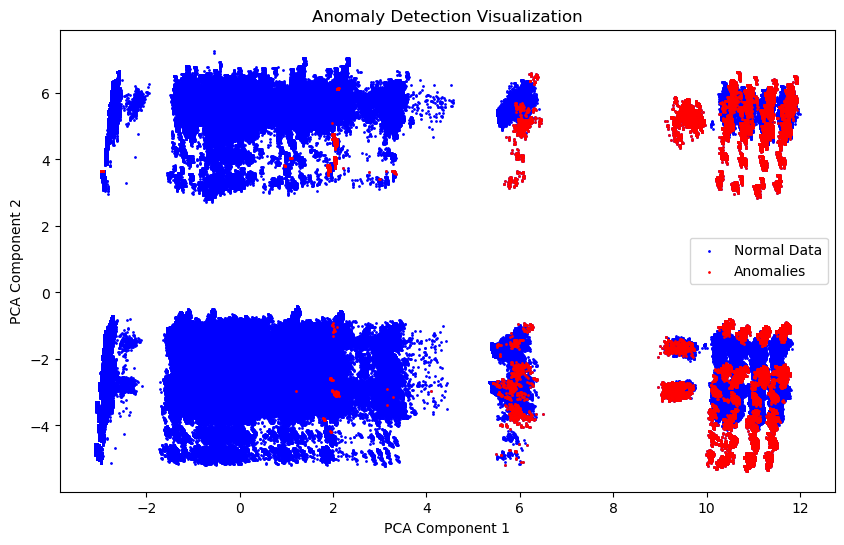

In [18]:


# Initializing and fitting MiniBatchKMeans with optimal k
clusterer = MiniBatchKMeans(n_clusters=10, batch_size=10000)
cluster_labels = clusterer.fit_predict(encoded_data_reduced)

df['cluster'] = cluster_labels

# Finding Anomalies based on distance from center of cluster

# Finding distances to cluster centers
distances = clusterer.transform(encoded_data_reduced)
assigned_cluster_distances = distances[np.arange(distances.shape[0]), cluster_labels]

# Determining threshold for anomalies  using the 99.7(e.g., mean + 3 standard deviations)
mean_distance = np.mean(assigned_cluster_distances)
std_distance = np.std(assigned_cluster_distances)
threshold = mean_distance + 3 * std_distance  

# Identifying anomalies
anomalies = assigned_cluster_distances > threshold
anomaly_indices = np.where(anomalies)[0]
print(f"Number of anomalies detected: {len(anomaly_indices)}")

anomaly_data = df.iloc[anomaly_indices]

anomaly_data.to_csv('anomalies.csv', index=False)

pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(encoded_data_reduced)

# Plotting all data points and highlighting anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c='blue', s=1, label='Normal Data')
plt.scatter(data_2d[anomaly_indices, 0], data_2d[anomaly_indices, 1], c='red', s=1, label='Anomalies')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Anomaly Detection Visualization')
plt.legend()
plt.show()
